In [1]:
import numpy as np 
import pandas as pd

game_data = pd.read_csv("/Users/rakshitmalhotra/Desktop/appgames.csv", index_col="ID", parse_dates=['Original Release Date', 'Current Version Release Date'])
game_data.head()

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,,,,,,
284921427,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
284926400,https://apps.apple.com/us/app/reversi/id284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17
284946595,https://apps.apple.com/us/app/morocco/id284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09
285755462,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30
285831220,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22


In [2]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
game_data["In-app Purchases"] = game_data["In-app Purchases"].fillna(0, axis=0)
game_data["Average User Rating"] = game_data["Average User Rating"].fillna(0, axis=0)
game_data["User Rating Count"] = game_data["User Rating Count"].fillna(0, axis=0)
game_data["Price"] = game_data["Price"].fillna(0, axis=0)
game_data["Languages"] = game_data["Languages"].fillna("EN", axis=0)
game_data['Size'].fillna(game_data['Size'].mean(), inplace=True)

game_data['Size'] = round(game_data['Size']/10**6, 2)

import datetime as dt
game_data['Original Release Year'] = game_data['Original Release Date'].dt.year
game_data['Current Version Release Year'] = game_data['Current Version Release Date'].dt.year


def to_binary(x):
    if x == 0:
        return 0
    else:
        return 1
        
game_data['In-app Purchases'] = game_data['In-app Purchases'].apply(to_binary)

def count_lang(y):
    return len(y.split(','))

game_data['Languages'] = game_data['Languages'].apply(count_lang)
game_data = game_data.drop(['Subtitle', 'Icon URL'], axis=1)
game_data.drop_duplicates(inplace=True)

game_data.head()


,URL,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Original Release Year,Current Version Release Year
ID,,,,,,,,,,,,,,,,,
284921427,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,17,15.85,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,2008,2017
284926400,https://apps.apple.com/us/app/reversi/id284926400,Reversi,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,1,12.33,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,2008,2018
284946595,https://apps.apple.com/us/app/morocco/id284946595,Morocco,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,1,0.67,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,2008,2017
285755462,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,17,21.55,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,2008,2017
285831220,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,15,34.69,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,2008,2018


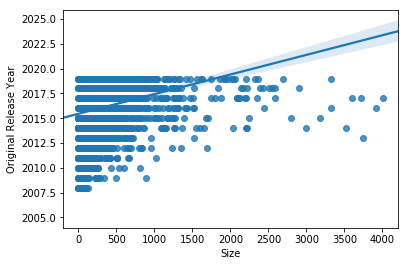

In [3]:
import seaborn as sb
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
sb.regplot(x=game_data['Size'], y=game_data['Original Release Year'])


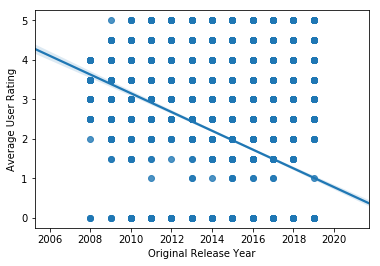

In [4]:
sb.regplot(data=game_data, x="Original Release Year", y="Average User Rating")


In [5]:

game_data['In-app Purchases']=round(game_data['In-app Purchases'].astype(np.float64), 1)
game_data['Languages']=round(game_data['Languages'].astype(np.float64),1)
game_data['Original Release Year']=round(game_data['Original Release Year'].astype(np.float64), 1)
game_data['Current Version Release Year']=round(game_data['Current Version Release Year'].astype(np.float64),1)
game_data['User Rating Count']=round(game_data['User Rating Count'].astype(np.float64),1)
game_data.dtypes


URL                                     object
Name                                    object
Average User Rating                    float64
User Rating Count                      float64
Price                                  float64
In-app Purchases                       float64
Description                             object
Developer                               object
Age Rating                              object
Languages                              float64
Size                                   float64
Primary Genre                           object
Genres                                  object
Original Release Date           datetime64[ns]
Current Version Release Date    datetime64[ns]
Original Release Year                  float64
Current Version Release Year           float64
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import category_encoders as ce

features = ['User Rating Count', 'Price', 'In-app Purchases', 'Languages', 'Size', 'Original Release Year', 'Current Version Release Year']

label_cols = ['Age Rating']
le = preprocessing.LabelEncoder()

encoded = game_data[label_cols].apply(le.fit_transform)
data = game_data[features].join(encoded)

count_cols = ['Developer'] 
count_enc = ce.CountEncoder(cols=count_cols)
finished_data = data.join(count_enc.fit_transform(game_data[count_cols]).add_suffix("_count"))

y = game_data["Average User Rating"]         
X = finished_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

game_model = RandomForestRegressor(n_estimators=150, max_leaf_nodes=100, random_state=1)
game_model.fit(X_train, y_train)

game_model_val_prediction = game_model.predict(X_val)
game_model_val_mae = mean_absolute_error(game_model_val_prediction, y_val)
game_model_R2 = r2_score(game_model_val_prediction, y_val)

print("Validation MAE for Random Forest Model: {}".format(game_model_val_mae))
print("R^2 score for RFM: {}".format(game_model_R2))


Validation MAE for Random Forest Model: 0.23036250226193805
R^2 score for RFM: 0.9485000926372638


In [7]:
finished_data.describe()


,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Year,Current Version Release Year,Age Rating,Developer_count
count,1.684700e+04,16847.000000,16847.000000,16847.000000,16847.000000,16847.000000,16847.000000,16847.000000,16847.000000
mean,1.469529e+03,0.814187,0.452009,3.254229,115.818139,2015.671692,2016.822461,1.865258,8.688609
std,2.839122e+04,7.865709,0.497706,6.165888,204.315302,2.311685,1.859195,0.806234,18.303664
min,0.000000e+00,0.000000,0.000000,1.000000,0.050000,2008.000000,2008.000000,0.000000,1.000000
25%,0.000000e+00,0.000000,0.000000,1.000000,22.950000,2014.000000,2016.000000,2.000000,1.000000
50%,0.000000e+00,0.000000,0.000000,1.000000,56.750000,2016.000000,2017.000000,2.000000,2.000000
75%,3.100000e+01,0.000000,1.000000,2.000000,132.960000,2017.000000,2018.000000,2.000000,7.000000
max,3.032734e+06,179.990000,1.000000,111.000000,4005.590000,2019.000000,2019.000000,3.000000,121.000000
